# Convolutional Neural Network (CNN) Classification
Convolutional Neural Network is a class of deep neural netowrks that are commonly applied to analyzing visual imagery. In this notebook, we are going to do a classification over the CIFAR-10 dataset using the CNN model. To do the classification, let's take one step at a time!

1. We are going to first construct the CNN model by filling out the correct dimensions of the CNN layers. After that, try to play with the paramaters of the convolutional layers, the pooling layers, the activational layers and the fully connected layers to see the performance change on the test set's accuracy. Our baseline CNN model has around 60% accuracy on the test set.

2. Now that we have our baseline model, let's try to improve our model.

    a) Learning rate (LR) and Optimizer: Adam or SGD:

            Try the Adam and SGD optimizers and find a proper LR so that you have a better performance on accuracy. 
        
    b) Avoid Overfitting: Early stopping strategy:

            Try to come up with the python implementation of an early stopping strategy to avoid overfitting.

    c) Data augmentation:

            Try to add some transformation on the dataset to improve the model's performance on accuracy.
            


## Load pytorch library

In [165]:
import torch
import torchvision
import torchvision.transforms as transforms


## Define validation dataset ratio

In [166]:

valid_ratio = 0.3

## Define the CIFAR-10 training and validation sets, and possible transforms to be applied. Optional augmentation can be done within the transform (TODO #2.c)
Data augmentation is a good way to enlarge the dataset so that the network trained becomes more robust and achieves better testing accuracy. Data augmentation, in short, is a way that takes a transform, such as rotation, flipping, scale, etc. to the data point to add more artificial created data points to the training set. 

In this section, try to add some data augmentation on the original dataset. You can start by uncomment the augmentation below.

Helpful link for augmentation methods by PyTorch: 

https://pytorch.org/docs/stable/torchvision/transforms.html

Helpful readings on augmentation: (optional)

1. https://nanonets.com/blog/data-augmentation-how-to-use-deep-learning-when-you-have-limited-data-part-2/

2. https://www.aiworkbox.com/lessons/augment-the-cifar10-dataset-using-the-randomhorizontalflip-and-randomcrop-transforms



In [167]:
transform = transforms.Compose(
    [
     # define your data augmentation HERE. You can start by uncomment the following line
     
       #transforms.RandomRotation(10),  
        transforms.RandomAffine(0,shear=10,scale=(0.8,1.2)),
    #transforms.RandomHorizontalFlip(),
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# No need to change anything below
train_valid_dataset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
nb_train = int((1.0 - valid_ratio) * len(train_valid_dataset))
nb_valid =  int(valid_ratio * len(train_valid_dataset))
train_dataset, valid_dataset = torch.utils.data.dataset.random_split(train_valid_dataset, [nb_train, nb_valid])
trainloader = torch.utils.data.DataLoader(train_dataset, batch_size=500,
                                          shuffle=True)
validloader = torch.utils.data.DataLoader(valid_dataset, batch_size=500,
                                          shuffle=True)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified


## Visualize the CIFAR-10 dataset.

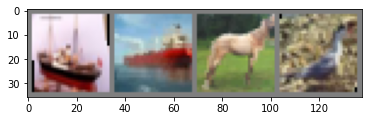

 ship  ship horse  bird


In [168]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images[:4,]))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

## Construct the CNN (TODO #1)
We are going to first construct the CNN model by filling out the correct dimensions of the CNN layers.

After that, try to play with the paramaters of the convolutional layers, the pooling layers, the activational layers and the fully connected layers to see the performance change on accuracy. 

Our baseline CNN model has around 60% accuracy on the test set.

Please show me the four numbers the question mark locates by filling out the blank.

Grading is based on if the CNN model you built is capable to be trained with the CIFAR-10 dataset so the answer for the second and last blank may vary.

In [169]:
import torch.nn as nn
import torch.nn.functional as F

# define your CNN here, e.g. activation function: F.sigmoid or F.relu

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(32, 32, kernel_size=3, stride=1, padding=0)
        self.fc1 = nn.Linear(1152, 512)
        self.fc2 = nn.Linear(512, 128)
        self.fc3 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = F.relu(self.conv3(x))
        x = x.view(-1, 1152)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x



## Instantiate the CNN and print out the number of parameters

In [170]:
net = Net()
print(sum([p.numel() for p in net.parameters()]))

671626


## Define the loss function and the optimizer. (TODO: #2.a)
Adam and SGD are two optimizers that are majorly used in deep learning netowrk design. Adam has a good performance in terms of good convergence speed and good accuracy.
However, Adam in some cases has a worse validation loss than SGD, in other words, Adam though converges fast, may not converge to the optimal minimum as good as SGD does.

Your task in this section is to try the Adam and SGD optimizers and find a proper LR so that you have a better performance on accuracy.

Helpful link for determining a good learning rate for Adam and SGD optimizer:

https://medium.com/octavian-ai/which-optimizer-and-learning-rate-should-i-use-for-deep-learning-5acb418f9b2

Helpful readings on Adam and SGD: (optional)

1. https://towardsdatascience.com/adam-latest-trends-in-deep-learning-optimization-6be9a291375c
    
2. https://shaoanlu.wordpress.com/2017/05/29/sgd-all-which-one-is-the-best-optimizer-dogs-vs-cats-toy-experiment/



In [171]:
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F

criterion = nn.CrossEntropyLoss()
# define your optimizer and its learning rate (lr) HERE
optimizer = optim.Adam(net.parameters(), lr=0.01)
# optimizer = optim.SGD(net.parameters(), lr=0.01)

## Select the device to train the CNN! "cuda:0" means the first GPU device.

In [172]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
net.to(device)

cuda:0


Net(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=1152, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=10, bias=True)
)

## Mount your google drive to current virtual machine and define the path to store the trained CNN parameters (optional)

In [173]:
'''
from google.colab import drive
drive.mount('/content/drive')
PATH = 'drive/My Drive/AML/mnist_net.pth'
'''

"\nfrom google.colab import drive\ndrive.mount('/content/drive')\nPATH = 'drive/My Drive/AML/mnist_net.pth'\n"

## Train the CNN and store the best model based on the validation loss (TODO: #2.b)
Training the neural network model too many epochs end up with high variance between training set and testing set, which also called an overfitting problem. Different strategies like L1 and L2 regularization, dropout and early stopping can be used to prevent the model from overfitting.

The idea behind early stopping is that when the generalization error increases, stop training the model to prevent overfitting problem. Note that early stopping strategy in some degree is the same as L2 regularization so it's an alternative to L2 regularization. More will be discussed in the lecture.

Your task in this section is to come up with a python implementation of an early stopping strategy to avoid overfitting.

Helpful readings for the early stopping strategy and other techniques to prevent overfitting problems.

1. https://machinelearningmastery.com/early-stopping-to-avoid-overtraining-neural-network-models/

2. https://towardsdatascience.com/preventing-deep-neural-network-from-overfitting-953458db800a



In [ ]:
import time
from keras.callbacks import EarlyStopping 

# define an empty list called validation_loss that might be helpful later in the early stopping implementation
validation_loss = []

start_time = time.time()
best_loss = np.float('inf')
for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data[0].to(device), data[1].to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
    epoch_loss = running_loss / (i+1)
    print("Epoch: ", epoch, " train loss: ", '%.3f' % epoch_loss)
    with torch.no_grad(): 
      running_loss = 0.0
      for i, data in enumerate(validloader, 0):
          # get the inputs; data is a list of [inputs, labels]
          inputs, labels = data[0].to(device), data[1].to(device)

          # forward 
          outputs = net(inputs)
          loss = criterion(outputs, labels)

          # print statistics
          running_loss += loss.item()
      epoch_loss = running_loss / (i+1)

      # add epoch_loss at each iteration to the validation_loss list which is later used in the early stopping implementation
      validation_loss.append(epoch_loss)

      print("Epoch: ", epoch, " validation loss: ", '%.3f' % epoch_loss)
      # save the best model based on validation loss
      if epoch_loss < best_loss:
        # torch.save(net.state_dict(), PATH)
        best_loss = epoch_loss

      # Early stopping implementation goes below: (TODO)
      estop= EarlyStopping(monitor='validation_loss',min_delta=0.0001,mode='min',verbose=1,patience=2)
time_elap = (time.time() - start_time) // 60
print('Finished Training in %d mins' % time_elap)

Epoch:  0  train loss:  1.678
Epoch:  0  validation loss:  1.598
Epoch:  1  train loss:  1.535
Epoch:  1  validation loss:  1.510
Epoch:  2  train loss:  1.423
Epoch:  2  validation loss:  1.371
Epoch:  3  train loss:  1.368
Epoch:  3  validation loss:  1.336
Epoch:  4  train loss:  1.299
Epoch:  4  validation loss:  1.344


## Define the test dataset

In [ ]:
transform = transforms.Compose(
     [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False)

## Visualize the test dataset

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
    
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

## Load the learned CNN parameters. This is required when you have trained the CNN and do no want to train it again by loading the learned parameters. (optional)

In [ ]:
# net.load_state_dict(torch.load(PATH))

## Get the predictions for the first 4 images in the test dataset

In [ ]:
with torch.no_grad():
  outputs = net(images.to(device))
  _, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

## Infer on the whole test dataset

In [ ]:
testloader = torch.utils.data.DataLoader(testset, batch_size=200,
                                         shuffle=False)
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images.to(device))
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels.to(device)).sum().item()

print('Accuracy of the network on the 10000 test images: %.3F %%' % (
    100 * correct / total))